In [1]:
!git clone https://github.com/vkhoi/KTH-Action-Recognition.git

Cloning into 'KTH-Action-Recognition'...
remote: Enumerating objects: 233, done.
remote: Total 233 (delta 0), reused 0 (delta 0), pack-reused 233
Receiving objects: 100% (233/233), 709.16 KiB | 11.08 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [2]:
%cd /content/KTH-Action-Recognition/dataset

/content/KTH-Action-Recognition/dataset


In [ ]:
!ls

00sequences.txt  boxing  data  download.sh  QUERY_VIDEO


In [3]:
!wget http://www.nada.kth.se/cvap/actions/boxing.zip
!wget http://www.nada.kth.se/cvap/actions/handclapping.zip
#!wget http://www.nada.kth.se/cvap/actions/handwaving.zip
#!wget http://www.nada.kth.se/cvap/actions/jogging.zip
#!wget http://www.nada.kth.se/cvap/actions/running.zip
#!wget http://www.nada.kth.se/cvap/actions/walking.zip

--2021-05-04 18:20:41--  http://www.nada.kth.se/cvap/actions/boxing.zip
Resolving www.nada.kth.se (www.nada.kth.se)... 130.237.28.41, 2001:6b0:1:11c2::82ed:1c29
Connecting to www.nada.kth.se (www.nada.kth.se)|130.237.28.41|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.csc.kth.se/cvap/actions/boxing.zip [following]
--2021-05-04 18:20:41--  https://www.csc.kth.se/cvap/actions/boxing.zip
Resolving www.csc.kth.se (www.csc.kth.se)... 130.237.28.41, 2001:6b0:1:11c2::82ed:1c29
Connecting to www.csc.kth.se (www.csc.kth.se)|130.237.28.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194498294 (185M) [application/zip]
Saving to: ‘boxing.zip’

boxing.zip          100%[===================>] 185.49M  1011KB/s    in 2m 52s  

2021-05-04 18:23:34 (1.08 MB/s) - ‘boxing.zip’ saved [194498294/194498294]

--2021-05-04 18:23:34--  http://www.nada.kth.se/cvap/actions/handclapping.zip
Resolving www.nada.kth.se (www.nada.kth.

In [4]:
!unzip boxing.zip -d boxing
!unzip handclapping.zip -d handclapping
#!unzip handwaving.zip -d handwaving
#!unzip jogging.zip -d jogging
#!unzip running.zip -d running
#!unzip walking.zip -d walking

!rm *.zip

Archive:  boxing.zip
  inflating: boxing/person01_boxing_d1_uncomp.avi  
  inflating: boxing/person01_boxing_d2_uncomp.avi  
  inflating: boxing/person01_boxing_d3_uncomp.avi  
  inflating: boxing/person01_boxing_d4_uncomp.avi  
  inflating: boxing/person02_boxing_d1_uncomp.avi  
  inflating: boxing/person02_boxing_d2_uncomp.avi  
  inflating: boxing/person02_boxing_d3_uncomp.avi  
  inflating: boxing/person02_boxing_d4_uncomp.avi  
  inflating: boxing/person03_boxing_d1_uncomp.avi  
  inflating: boxing/person03_boxing_d2_uncomp.avi  
  inflating: boxing/person03_boxing_d3_uncomp.avi  
  inflating: boxing/person03_boxing_d4_uncomp.avi  
  inflating: boxing/person04_boxing_d1_uncomp.avi  
  inflating: boxing/person04_boxing_d2_uncomp.avi  
  inflating: boxing/person04_boxing_d3_uncomp.avi  
  inflating: boxing/person04_boxing_d4_uncomp.avi  
  inflating: boxing/person05_boxing_d1_uncomp.avi  
  inflating: boxing/person05_boxing_d2_uncomp.avi  
  inflating: boxing/person05_boxing_d3_unco

In [ ]:
#CODE FOR EXTRACTING PIXEL VALUES as features and storing as feature files

import cv2
import numpy as np
import os
import pickle

CATEGORIES = ["boxing", "handclapping", "handwaving"]#, "jogging", "running", 
   # "walking"]

if __name__ == "__main__":

    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    
    n_processed_files = 0

    for category in CATEGORIES:
        print("Processing category %s" % category)

        # Get all files in current category's folder.
        folder_path = os.path.join("..", "dataset", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        features = []

        for filename in filenames:
            filepath = os.path.join("..", "dataset", category, filename)
            path = "/content/KTH-Action-Recognition/dataset/" + category + "/" + filename
            vid = cv2.VideoCapture(filepath)

            # Store features in current file.
            features_current_file_new = []

            
            count_frame = 0
            while vid.isOpened():
                ret, frame = vid.read()
                count_frame = count_frame + 1
                if not ret:
                    break
                if(count_frame < 31):
                # Only care about gray scale.
                  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                
                  features_current_file_new.append(frame)
                  features_current_file = np.array(features_current_file_new)

            print(filename)    
            print(path)
            features.append({
                "filename": filename,
                "path" : path,
                "category": category,
                "features": features_current_file 
            })

            n_processed_files += 1
            if n_processed_files % 30 == 0:
                print("Done %d files" % n_processed_files)

        # Dump data to file.
        pickle.dump(features, open("data/pixel_%s.p" % category, "wb"))




Processing category boxing
person08_boxing_d3_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person08_boxing_d3_uncomp.avi
person06_boxing_d1_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person06_boxing_d1_uncomp.avi
person02_boxing_d3_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person02_boxing_d3_uncomp.avi
person18_boxing_d4_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person18_boxing_d4_uncomp.avi
person08_boxing_d4_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person08_boxing_d4_uncomp.avi
person25_boxing_d3_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person25_boxing_d3_uncomp.avi
person24_boxing_d1_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person24_boxing_d1_uncomp.avi
person14_boxing_d2_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person14_boxing_d2_uncomp.avi
person05_boxing_d1_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person05_boxing_d1_uncomp.avi
person03_b

In [ ]:
#CODE FOR EXTRACTING PIXEL VALUES as features and storing as feature files all categories in one pickle file

import cv2
import numpy as np
import os
import pickle

CATEGORIES = ["boxing", "handclapping"]#, "handwaving"]#, "jogging", "running", 
   # "walking"]

if __name__ == "__main__":

    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    
    n_processed_files = 0
    features = []

    for category in CATEGORIES:
        print("Processing category %s" % category)

        # Get all files in current category's folder.
        folder_path = os.path.join("..", "dataset", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []

        for filename in filenames:
            filepath = os.path.join("..", "dataset", category, filename)
            path = "/content/KTH-Action-Recognition/dataset/" + category + "/" + filename
            vid = cv2.VideoCapture(filepath)

            # Store features in current file.
            features_current_file_new = []

            
            count_frame = 0
            while vid.isOpened():
                ret, frame = vid.read()
                count_frame = count_frame + 1
                if not ret:
                    break
                if(count_frame < 241):
                # Only care about gray scale.
                  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                
                  features_current_file_new.append(frame)
                  features_current_file = np.array(features_current_file_new)

            print(filename)    
            print(path)
            features.append({
                "filename": filename,
                "path" : path,
                "category": category,
                "features": features_current_file 
            })

            n_processed_files += 1
            if n_processed_files % 30 == 0:
                print("Done %d files" % n_processed_files)

        # Dump data to file.
pickle.dump(features, open("data/pixel.p" , "wb"))




Processing category boxing
person08_boxing_d3_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person08_boxing_d3_uncomp.avi
person06_boxing_d1_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person06_boxing_d1_uncomp.avi
person02_boxing_d3_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person02_boxing_d3_uncomp.avi
person18_boxing_d4_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person18_boxing_d4_uncomp.avi
person08_boxing_d4_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person08_boxing_d4_uncomp.avi
person25_boxing_d3_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person25_boxing_d3_uncomp.avi
person24_boxing_d1_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person24_boxing_d1_uncomp.avi
person14_boxing_d2_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person14_boxing_d2_uncomp.avi
person05_boxing_d1_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person05_boxing_d1_uncomp.avi
person03_b

In [11]:
##CODE FOR EXTRACTING OPTICALFLOW VALUES as features and storing as feature files all categories in one pickle file
import cv2
import numpy as np
import os
import pickle

CATEGORIES = ["boxing", "handclapping"]#, "handwaving", "jogging", "running", 
    #"walking"]

if __name__ == "__main__":

    # Create directory to store extracted SIFT features.
    os.makedirs("data", exist_ok=True)

    # Setup parameters for optical flow.
    farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)

    n_processed_files = 0
    features = []

    for category in CATEGORIES:
        print("Processing category %s" % category)

        # Get all files in current category's folder.
        folder_path = os.path.join("..", "dataset", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []

        for filename in filenames:
            filepath = os.path.join("..", "dataset", category, filename)
            path = "/content/KTH-Action-Recognition/dataset/" + category + "/" + filename
            vid = cv2.VideoCapture(filepath)

            # Store features in current file.
            features_current_file = []

            prev_frame = None

            while vid.isOpened():
                ret, frame = vid.read()
                if not ret:
                    break

                # Only care about gray scale.
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

                if prev_frame is not None:
                    # Calculate optical flow.
                    flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,
                        **farneback_params)

                    feature = []
                    for r in range(120):
                        if r % 10 != 0:
                            continue
                        for c in range(160):
                            if c % 10 != 0:
                                continue
                            feature.append(flows[r,c,0])
                            feature.append(flows[r,c,1])
                    feature = np.array(feature)

                    features_current_file.append(feature)

                prev_frame = frame

            features.append({
                "filename": filename,
                "path" : path,
                "category": category,
                "features": features_current_file 
            })

            n_processed_files += 1
            if n_processed_files % 30 == 0:
              print("Done %d files" % n_processed_files)

        # Dump data to file.
#pickle.dump(features, open("data/optflow_%s.p" % category, "wb"))
pickle.dump(features, open("data/optflow.p" , "wb"))




Processing category boxing
Done 30 files
Done 60 files
Done 90 files
Processing category handclapping
Done 120 files
Done 150 files
Done 180 files


In [12]:
print(len(features))

199


In [13]:
#Accessing the feature database
import pickle

# open a file, where you stored the pickled data
file = open('/content/KTH-Action-Recognition/dataset/data/optflow.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item['path'])
    print('The data ', cnt, ' is : ', len(item['features']))
    cnt += 1

Showing the pickled data:
The data  0  is :  /content/KTH-Action-Recognition/dataset/boxing/person13_boxing_d1_uncomp.avi
The data  0  is :  537
The data  1  is :  /content/KTH-Action-Recognition/dataset/boxing/person23_boxing_d4_uncomp.avi
The data  1  is :  367
The data  2  is :  /content/KTH-Action-Recognition/dataset/boxing/person24_boxing_d1_uncomp.avi
The data  2  is :  365
The data  3  is :  /content/KTH-Action-Recognition/dataset/boxing/person04_boxing_d3_uncomp.avi
The data  3  is :  389
The data  4  is :  /content/KTH-Action-Recognition/dataset/boxing/person16_boxing_d3_uncomp.avi
The data  4  is :  529
The data  5  is :  /content/KTH-Action-Recognition/dataset/boxing/person17_boxing_d1_uncomp.avi
The data  5  is :  377
The data  6  is :  /content/KTH-Action-Recognition/dataset/boxing/person16_boxing_d4_uncomp.avi
The data  6  is :  459
The data  7  is :  /content/KTH-Action-Recognition/dataset/boxing/person02_boxing_d3_uncomp.avi
The data  7  is :  489
The data  8  is :  /co

In [ ]:
#Accessing the feature database
import pickle
import pandas as pd

df = pd.read_pickle('/content/KTH-Action-Recognition/dataset/data/pixel_boxing.p')
#df = df.filter(['path', 'features'])
print(df[0])

{'filename': 'person08_boxing_d3_uncomp.avi', 'path': '/content/KTH-Action-Recognition/dataset/boxing/person08_boxing_d3_uncomp.avi', 'category': 'boxing', 'features': array([[[180, 175, 173, ..., 182, 185, 176],
        [152, 147, 147, ..., 153, 153, 151],
        [146, 156, 146, ..., 159, 151, 154],
        ...,
        [121, 121, 145, ..., 149, 124, 125],
        [124, 129, 135, ..., 146, 144, 137],
        [132, 140, 144, ..., 147, 143, 135]],

       [[180, 178, 174, ..., 182, 185, 176],
        [152, 150, 147, ..., 153, 153, 151],
        [146, 151, 151, ..., 159, 151, 154],
        ...,
        [123, 124, 132, ..., 144, 137, 125],
        [129, 131, 137, ..., 142, 145, 140],
        [132, 136, 142, ..., 145, 145, 139]],

       [[180, 179, 175, ..., 183, 180, 176],
        [152, 151, 149, ..., 153, 152, 151],
        [146, 149, 151, ..., 154, 152, 154],
        ...,
        [125, 128, 135, ..., 123, 138, 139],
        [130, 133, 139, ..., 161, 146, 146],
        [132, 135, 138, 

In [ ]:
import cv2

#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/QUERY/person01_boxing_d1_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  if(count_frame < 101):
  # Only care about gray scale.
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                
    features_current_file_new.append(frame)
    features_current_file = np.array(features_current_file_new)

# No of frames
print(len(features_current_file))  
            

            

100


In [14]:
#EXTRACTING OPTICAL FLOW FROM QUERY VIDEO
import cv2

#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/QUERY/person01_boxing_d1_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
prev_frame = None
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  
  # Only care about gray scale.
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  if prev_frame is not None:
                    # Calculate optical flow.
    flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,**farneback_params)

    feature = []
    for r in range(120):
      if r % 10 != 0:
        continue
        for c in range(160):
          if c % 10 != 0:
            continue
            feature.append(flows[r,c,0])
            feature.append(flows[r,c,1])
    feature = np.array(feature)

  features_current_file.append(feature)

  prev_frame = frame

# No of frames
print(len(features_current_file))  
            

            

755


In [ ]:
#CBVR SAMPLE TEST BENCH FOR PIXEL BASED COMPARISONS
#Accessing the feature database
import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame


# List to store result
feature_result = []

#CODE TO EXTRACT FEATURES FROM QUERY IMAGE


#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/QUERY_VIDEO/person08_boxing_d3_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  if(count_frame < 241):
  # Only care about gray scale.
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                
    features_current_file_new.append(frame)
    features_current_file = np.array(features_current_file_new)

# No of frames
print(len(features_current_file))  
            

            





# open a file, where you stored the pickled data
file = open('/content/KTH-Action-Recognition/dataset/data/pixel.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    print('The data ', cnt, ' is : ', len(item['features']))

    
    point_a = np.array(item['features'])
    point_b = np.array(features_current_file)

    distance = np.linalg.norm(point_a - point_b)
    print(distance)
    
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance,
                "category" : item['category'] 
            })

    cnt += 1

print(feature_result)
df = DataFrame (feature_result)
print (df)



df1 = df.sort_values(by=['similarity'])
print(df1)



240
Showing the pickled data:
The data  0  is :  240
0.0
The data  1  is :  240
452577.0083764751
The data  2  is :  240
349614.1413830396
The data  3  is :  240
373891.38959195086
The data  4  is :  240
388984.0688472987
The data  5  is :  240
383608.86658809124
The data  6  is :  240
395449.4207013079
The data  7  is :  240
193683.0825369113
The data  8  is :  240
383654.5868382131
The data  9  is :  240
377845.42556712264
The data  10  is :  240
204990.24862173322
The data  11  is :  240
422812.85920487327
The data  12  is :  240
463687.4558374423
The data  13  is :  240
315104.26204036025
The data  14  is :  240
387896.18611169665
The data  15  is :  240
224590.3243931047
The data  16  is :  240
375865.25681419397
The data  17  is :  240
324743.3747068599
The data  18  is :  240
344088.1203078653
The data  19  is :  240
219621.49642509953
The data  20  is :  240
413745.2959321713
The data  21  is :  240
299897.14561662637
The data  22  is :  240
213167.33158014622
The data  23  is 

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0

Total = len(df1) 
print(Total)
res = []
query = 'boxing'
#for i in range(0,Total):
for index, row in df1.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet = []
mar_fet = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  TP = TP + map[i]
  mTP = TP / (i+1)
  mTR = TP / (100)
  map_fet.append(mTP)
  mar_fet.append(mTR)
  mTP = 0



print(map_fet)
print(mar_fet)



299
['boxing', 'boxing', 'handwaving', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'handwaving', 'boxing', 'boxing', 'handwaving', 'boxing', 'boxing', 'handwaving', 'handwaving', 'handwaving', 'handwaving', 'handclapping', 'boxing', 'boxing', 'boxing', 'handclapping', 'handwaving', 'handclapping', 'handclapping', 'handclapping', 'handwaving', 'handclapping', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handwaving', 'boxing', 'handclapping', 'handwaving', 'boxing', 'boxing', 'handwaving', 'handwaving', 'handwaving', 'handwaving', 'handclapping', 'handwaving', 'handclapping', 'boxing', 'handwaving', 'boxing', 'boxing', 'boxing', 'handwaving', 'boxing', 'handwaving', 'handclapping', 'handwaving', 'boxing', 'handclapping', 'handwaving', 'handclapping', 'handclapping', 'boxing', 'boxing', 'handwaving', 'handclapping', 'handwaving', 'handclapping', 'handwaving', 'handwaving', 'handclapping', 'handwaving', 'handwaving', 'ha

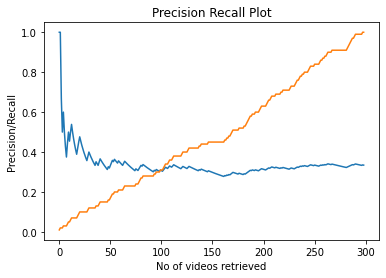

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
x = np.arange(0, len(res), 1)
y1 = map_fet
y2 = mar_fet
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("No of videos retrieved")
plt.ylabel("Precision/Recall")
plt.title('Precision Recall Plot')
plt.show()

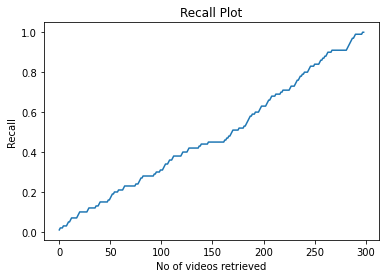

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
x = np.arange(0, len(res), 1)
y = mar_fet
plt.plot(x,y)
plt.xlabel("No of videos retrieved")
plt.ylabel("Recall")
plt.title('Recall Plot')
plt.show()

In [ ]:
import argparse
import numpy as np
import os
import pickle

from sklearn.cluster import KMeans
from numpy import size

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Run KMeans on training set")
    parser.add_argument("--dataset", type=str, default="data/train_keypoints.p",
                        help="number of clusters")
    parser.add_argument("--clusters", type=int, default=500,
                        help="number of clusters")

    args = parser.parse_args()
    dataset = args.dataset
    clusters = args.clusters

    print("Loading dataset")
    train_features = pickle.load(open(dataset, "rb"))
    n_features = len(train_features)

    print("Number of feature points to run clustering on: %d" % n_features)

    # Clustering with KMeans.
    print("Running KMeans clustering")
    kmeans = KMeans(init='k-means++', n_clusters=clusters, n_init=10, n_jobs=2,
        verbose=1)
    kmeans.fit(train_features)

    # Save trained kmeans object to file.
    pickle.dump(kmeans, open("data/cb_%dclusters.p" % clusters, "wb"))


In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#import the dataset
df = pd.read_csv('/content/KTH-Action-Recognition/dataset/iris.csv')
df.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [ ]:
x = df.iloc[:, [0,1,2,3]].values
print(x)

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.

In [ ]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_
print(kmeans5.cluster_centers_)

closest, _ = pairwise_distances_argmin_min(kmeans5.cluster_centers_, x)
#closest
print(closest)

print(x[0])
print(x[6])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 0 4 0 4 0 4 0 0 0 0 4 0 4 0 0 4 0 4 0 4 4 4
 4 4 4 4 0 0 0 0 4 0 4 4 4 0 0 0 4 0 0 0 0 0 4 0 0 2 4 3 2 2 3 0 3 2 3 2 2
 2 4 2 2 2 3 3 4 2 4 3 4 2 3 4 4 2 3 3 3 2 4 4 3 2 2 4 2 2 2 4 2 2 2 4 2 2
 4]
[[5.53214286 2.63571429 3.96071429 1.22857143]
 [5.00408163 3.41632653 1.46530612 0.24489796]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [7.475      3.125      6.3        2.05      ]
 [6.24722222 2.84722222 4.775      1.575     ]]
[ 88   6 111 104 125]
[4.9 3.  1.4 0.2]
[5.  3.4 1.5 0.2]


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
X = np.random.randn(100, 20)
print(X)
km = KMeans(n_clusters=20).fit(X)
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)
closest
#array([0, 8])

[[-2.94033245  0.83936396 -0.51266929 ...  0.77515106 -0.33459277
   0.9976004 ]
 [-0.23442631 -0.17390404 -0.45171177 ... -2.47829797  1.48133824
  -0.23963099]
 [-0.51102927  0.94942355  1.10846045 ...  0.02878132  0.67745242
  -0.34664606]
 ...
 [ 0.10153111 -0.9837736  -1.4848368  ...  0.04873611 -0.8096706
   0.35340323]
 [ 1.0974739  -0.52019694  1.02919641 ... -0.58051814  0.51066433
  -1.17141268]
 [-0.44616074  0.73741822 -0.76280989 ... -0.17154862  1.55487147
  -1.44109268]]


array([37, 82, 78, 29, 16,  8, 51, 45,  5, 64, 50, 39, 85, 86,  4, 93, 11,
       33, 68, 14])

In [ ]:
print(closest[2])
print(X[0])

78
[-2.94033245  0.83936396 -0.51266929  0.43541653 -0.35277399  0.13103227
  2.0096377   0.9926436   0.276636   -0.34530603 -0.0499685  -0.10683918
  2.07233779 -0.37948326 -1.53009878 -0.25256706 -0.11830782  0.77515106
 -0.33459277  0.9976004 ]


In [ ]:
import cv2

#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/QUERY_VIDEO/person08_boxing_d1_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  
  # Only care about gray scale.
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                
  features_current_file_new.append(frame)
  features_current_file = np.array(features_current_file_new)

# No of frames
print(len(features_current_file)) 
print(features_current_file) 
            

            

420
[[[168 175 172 ... 173 174 171]
  [144 138 140 ... 147 147 147]
  [137 144 144 ... 149 147 144]
  ...
  [117 121 117 ... 125 147 121]
  [133 128 135 ... 102 147 121]
  [138 118 125 ... 149 125 110]]

 [[168 172 174 ... 175 174 173]
  [144 142 139 ... 149 147 147]
  [137 140 144 ... 150 149 146]
  ...
  [125 125 125 ... 131 137 135]
  [136 130 126 ... 123 125 135]
  [139 129 122 ... 146 137 118]]

 [[168 170 173 ... 176 174 173]
  [144 143 140 ... 149 147 147]
  [137 138 142 ... 151 149 147]
  ...
  [133 132 131 ... 136 129 132]
  [133 132 131 ... 139 132 129]
  [122 123 124 ... 144 142 128]]

 ...

 [[159 167 164 ... 173 170 178]
  [140 136 138 ... 149 146 146]
  [137 138 142 ... 140 144 136]
  ...
  [126 124 122 ... 129 142 136]
  [119 126 137 ... 131 137 128]
  [121 119 126 ... 118 131 132]]

 [[160 166 166 ... 173 171 176]
  [140 136 137 ... 149 147 146]
  [137 138 142 ... 142 146 137]
  ...
  [124 118 128 ... 138 142 140]
  [119 131 130 ... 132 131 131]
  [119 121 130 ... 117 1

In [ ]:
feat_video = []
for j in range(0,len(features_current_file)):
  feat_flat = features_current_file[j][0]
  for i in range(1, features_current_file.shape[1]):
    print(len(feat_flat))
    feat_flat = np.concatenate((feat_flat, features_current_file[i][0]), axis=None)
  feat_video.append(feat_flat)

#print(feat_video)

fea_video = np.array(feat_video)
print(fea_video.shape)
print(fea_video)


Streaming output truncated to the last 5000 lines.
1120
1280
1440
1600
1760
1920
2080
2240
2400
2560
2720
2880
3040
3200
3360
3520
3680
3840
4000
4160
4320
4480
4640
4800
4960
5120
5280
5440
5600
5760
5920
6080
6240
6400
6560
6720
6880
7040
7200
7360
7520
7680
7840
8000
8160
8320
8480
8640
8800
8960
9120
9280
9440
9600
9760
9920
10080
10240
10400
10560
10720
10880
11040
11200
11360
11520
11680
11840
12000
12160
12320
12480
12640
12800
12960
13120
13280
13440
13600
13760
13920
14080
14240
14400
14560
14720
14880
15040
15200
15360
15520
15680
15840
16000
16160
16320
16480
16640
16800
16960
17120
17280
17440
17600
17760
17920
18080
18240
18400
18560
18720
18880
19040
160
320
480
640
800
960
1120
1280
1440
1600
1760
1920
2080
2240
2400
2560
2720
2880
3040
3200
3360
3520
3680
3840
4000
4160
4320
4480
4640
4800
4960
5120
5280
5440
5600
5760
5920
6080
6240
6400
6560
6720
6880
7040
7200
7360
7520
7680
7840
8000
8160
8320
8480
8640
8800
8960
9120
9280
9440
9600
9760
9920
10080
10240
10400
10560

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
X = fea_video
print(X)
km = KMeans(n_clusters=20).fit(X)
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)
closest
print(closest)

#print(closest[0])

[[168 175 172 ... 170 172 176]
 [168 172 174 ... 170 172 176]
 [168 170 173 ... 170 172 176]
 ...
 [159 167 164 ... 170 172 176]
 [160 166 166 ... 170 172 176]
 [160 168 164 ... 170 172 176]]
[ 49  64 328 226 387 399 187 159 372  10 239  38 304 411 284 176 106 348
 253  33]


In [ ]:
print(closest)

print(closest[0])

[173 159 355  67 226 284  10 402 259  36 387 374 239 187 106 304 328 411
  56 253]
173


In [ ]:
print(features_current_file.shape)

column = features_current_file.shape[1] * features_current_file.shape[2]
print(column)

print("first frame")
print(features_current_file[0])
print("second frame")
print(features_current_file[1])

feat_flat = features_current_file[0][0]
 
for i in range(1, features_current_file.shape[1]):
  print(len(feat_flat))
  feat_flat = np.concatenate((feat_flat, features_current_file[i][0]), axis=None)
#1D pixel value of one frame of a video
print(len(feat_flat))

(420, 120, 160)
19200
first frame
[[168 175 172 ... 173 174 171]
 [144 138 140 ... 147 147 147]
 [137 144 144 ... 149 147 144]
 ...
 [117 121 117 ... 125 147 121]
 [133 128 135 ... 102 147 121]
 [138 118 125 ... 149 125 110]]
second frame
[[168 172 174 ... 175 174 173]
 [144 142 139 ... 149 147 147]
 [137 140 144 ... 150 149 146]
 ...
 [125 125 125 ... 131 137 135]
 [136 130 126 ... 123 125 135]
 [139 129 122 ... 146 137 118]]
160
320
480
640
800
960
1120
1280
1440
1600
1760
1920
2080
2240
2400
2560
2720
2880
3040
3200
3360
3520
3680
3840
4000
4160
4320
4480
4640
4800
4960
5120
5280
5440
5600
5760
5920
6080
6240
6400
6560
6720
6880
7040
7200
7360
7520
7680
7840
8000
8160
8320
8480
8640
8800
8960
9120
9280
9440
9600
9760
9920
10080
10240
10400
10560
10720
10880
11040
11200
11360
11520
11680
11840
12000
12160
12320
12480
12640
12800
12960
13120
13280
13440
13600
13760
13920
14080
14240
14400
14560
14720
14880
15040
15200
15360
15520
15680
15840
16000
16160
16320
16480
16640
16800
16960
1

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)
a = np.concatenate((a, b), axis=None)
#array([1, 2, 3, 4, 5, 6])
print(a)

[1 2 3 4 5 6]


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
X = features_current_file
print(X)
km = KMeans(n_clusters=20).fit(X)
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)
closest

[[[168 175 172 ... 173 174 171]
  [144 138 140 ... 147 147 147]
  [137 144 144 ... 149 147 144]
  ...
  [117 121 117 ... 125 147 121]
  [133 128 135 ... 102 147 121]
  [138 118 125 ... 149 125 110]]

 [[168 172 174 ... 175 174 173]
  [144 142 139 ... 149 147 147]
  [137 140 144 ... 150 149 146]
  ...
  [125 125 125 ... 131 137 135]
  [136 130 126 ... 123 125 135]
  [139 129 122 ... 146 137 118]]

 [[168 170 173 ... 176 174 173]
  [144 143 140 ... 149 147 147]
  [137 138 142 ... 151 149 147]
  ...
  [133 132 131 ... 136 129 132]
  [133 132 131 ... 139 132 129]
  [122 123 124 ... 144 142 128]]

 ...

 [[159 167 164 ... 173 170 178]
  [140 136 138 ... 149 146 146]
  [137 138 142 ... 140 144 136]
  ...
  [126 124 122 ... 129 142 136]
  [119 126 137 ... 131 137 128]
  [121 119 126 ... 118 131 132]]

 [[160 166 166 ... 173 171 176]
  [140 136 137 ... 149 147 146]
  [137 138 142 ... 142 146 137]
  ...
  [124 118 128 ... 138 142 140]
  [119 131 130 ... 132 131 131]
  [119 121 130 ... 117 131 1

ValueError: ignored